<!DOCTYPE html>
<html lang="en">

<body>
    <h1>
        <b>
            <p style="background-color:#f0f8ff;font-family:'Arial', sans-serif;font-size:36;color: blue;text-align:center;border-radius:15px 50px; padding:18px; border:solid 2px blue; box-shadow: 10px 10px 10px #031a3a">
                Table Of Contents
            </p>
        </b>
    </h1>
    <a id="a"></a>    
    <div style="background-color:#fafbfc;font-family:Arial;font-size:120%;color:blue;border-radius:25px; padding:7px; border:solid 2px blue; ">
  
   * **[Data Collection](#data)**
   * **[EDA (Exploratory Data Analysis)](#eda)**
     - [Loading Data](#loading)
     - [First Look at Data](#flook)
     - [Statistical Summeries](#summ)
     - [Visualization](#vis) 
   * **[Data Preprocessing](#prep)**
     - [Data Cleaning](#cleaning)
     - [Dealing With Imbalanced Data](#imbalanced)
     * [Feature Engineering](#feature_engineering)
       - [Categorical Features Encoding](#encoding)
       - [Numeric Feature Scaling and Normalization](#norm)
     *[Feature Selection](#feature_selection)
   * **[Modeling](#modeling)**
     - [Model Selection](#model_selection)
     - [Training and Testing](#training)
     - [Evaluation](#evaluation)
     -[Results Visualization](#visualizations)
  
    </div>
</body>
</html>



<h1>
     <a id="data"></a> 
        <b>
            <p style="background-color:#f0f8ff;font-family:'Arial', sans-serif;font-size:36;color: blue;text-align:center;border-radius:15px 50px; padding:18px; border:solid 2px blue; box-shadow: 10px 10px 10px #031a3a">
               Data Collection
            </p>
        </b>
    </h1>
    <a id=""></a>    
<div style="background-color:#fafbfc;font-family:Arial;font-size:120%;border-radius:25px ; padding:15px; border:solid 2px blue;text-align:center; ">
        
   <p>
    Leveraging the 'iotdataset,' a reliable and large 2.6 GB data source, we've created a smaller, balanced subset for easier handling. We've ensured the inclusion of minority classes like 'xss','sqlinjection'...etc, despite their lower occurrence, for a broader understanding of cyberattacks. This method optimizes resources, upholds quality, and helps build a comprehensive cybersecurity system.
</div>


<h1>
      <a id="eda"></a> 
        <b>
            <p style="background-color:#f0f8ff;font-family:'Arial', sans-serif;font-size:36;color: blue;text-align:center;border-radius:15px 50px; padding:18px; border:solid 2px blue; box-shadow: 10px 10px 10px #031a3a">
              EDA (Exploratory Data Analysis)
            </p>
        </b>
    </h1>
    <a id=""></a>    
<div style="background-color:#fafbfc;font-family:Arial;font-size:120%;border-radius:25px ; padding:15px; border:solid 2px blue;text-align:center; ">
        
   <p>
In this section, we'll conduct an Exploratory Data Analysis (EDA) to reveal patterns, understand feature relationships, and extract valuable insights from our dataset. This will guide our subsequent data analysis steps.
</div>


   <a id="loading"></a>
<h2><b><span style="color:blue">  1 | Loading Data</span></b></h2>




<a id="import"></a>
<h4><span style="color:blue">   Importing necessary Libreries</span></h4>
To initiate the primary Exploratory Data Analysis (EDA), we begin by importing essential libraries like Pandas and NumPy. This step provides us with powerful tools for efficient data handling, exploration, and analysis

In [139]:
import os
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tabulate import tabulate


<h4><span style="color:blue"> Getting Data Ready</span></h4>
The analysis was conducted on https://www.kaggle.com/, a user-friendly data platform.

In [88]:

dataset = '/kaggle/input/iotdata/dataset.csv'
df = pd.read_csv(dataset)

   <a id="flook"></a>
<h2><b><span style="color:blue">  2 | First Look At Data</span></b></h2>


<h4><span style="color:blue"> Capturing the Beginning</span></h4>

In [89]:
pd.set_option('display.max_columns', None)
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,46.53,63.36,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6205.36,581.36,592.0,591.454,2.347407,586.68,8.367709e+07,9.5,34.392829,3.36,282.24,0.02,141.55,Mirai-greeth_flood
1,0.000000,0.0,1.00,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.0,42.000,0.000000,42.00,8.312401e+07,9.5,9.165151,0.00,0.00,0.00,141.55,DDoS-ICMP_Flood
2,0.084220,17239.0,17.00,64.00,4784.576946,4784.576946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.0,50.000,0.000000,50.00,8.310203e+07,9.5,10.000000,0.00,0.00,0.00,141.55,DDoS-UDP_Flood
3,4.499601,108.0,6.00,64.00,0.444484,0.444484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.0,54.000,0.000000,54.00,8.298535e+07,9.5,10.392305,0.00,0.00,0.00,141.55,DoS-SYN_Flood
4,0.018421,14575.0,17.00,64.00,15799.267521,15799.267521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.0,50.000,0.000000,50.00,8.301666e+07,9.5,10.000000,0.00,0.00,0.00,141.55,DoS-UDP_Flood



<h4><span style="color:blue"> Exploring the Tail</span></h4>

In [90]:
pd.set_option('display.max_columns', None)
df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
3657065,0.009404,7475.00,17.00,64.00,41139.197472,41139.197472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.303326e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
3657066,0.035568,35625.00,17.00,64.00,20149.148990,20149.148990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310311e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
3657067,0.076069,23914.59,16.84,66.55,6343.258924,6343.258924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,548.58,50.0,73.58,51.926725,6.356009,51.87,8.310227e+07,9.5,10.179486,8.939750,291.531191,0.14,141.55,DDoS-UDP_Flood
3657068,0.000000,54.00,6.00,64.00,14.189744,14.189744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.294732e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
3657069,0.029805,735.77,6.00,65.27,0.426427,0.426427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9805.57,334.7,1499.84,953.168955,550.781041,909.37,8.333536e+07,9.5,43.490852,778.786778,319835.176787,0.95,141.55,DDoS-ACK_Fragmentation



<h4><span style="color:blue">  Dataset Features</span></h4>
Displaying the various features included in the dataset,help presenting a comprehensive view of its structure.

In [91]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


<h4><span style="color:blue"> Displaying Label Feature</span></h4>

In [92]:
label_values = df['label'].unique()
label_values

array(['Mirai-greeth_flood', 'DDoS-ICMP_Flood', 'DDoS-UDP_Flood',
       'DoS-SYN_Flood', 'DoS-UDP_Flood', 'DDoS-RSTFINFlood',
       'DDoS-TCP_Flood', 'Recon-OSScan', 'DDoS-SYN_Flood',
       'Mirai-greip_flood', 'DDoS-PSHACK_Flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DoS-TCP_Flood',
       'MITM-ArpSpoofing', 'DNS_Spoofing', 'BenignTraffic',
       'Recon-PortScan', 'DDoS-ICMP_Fragmentation',
       'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation',
       'Recon-HostDiscovery', 'DDoS-SlowLoris', 'DoS-HTTP_Flood',
       'VulnerabilityScan', 'DDoS-HTTP_Flood', 'XSS',
       'DictionaryBruteForce', 'Backdoor_Malware', 'CommandInjection',
       'SqlInjection', 'BrowserHijacking', 'Uploading_Attack',
       'Recon-PingSweep'], dtype=object)


<h4><span style="color:blue"> Cheking Data Types</span></h4>

In [93]:
dtypes_df = df.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Data Type']
dtypes_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Column,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object



<h4><span style="color:blue"> Dataset Dimensions</span></h4>

In [94]:
df.shape

(3657070, 47)

 
<h4><span style="color:blue"> Checking Duplication</span></h4>

In [95]:
df.duplicated().sum()

0

 
<h4><span style="color:blue"> Checking Missing Values</span></h4>

In [96]:
mv = df.isnull().sum().reset_index()
mv.columns = ['Column', 'Missing Values']
mv.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Column,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 
<h4><span style="color:blue"> Dataset Information</span></h4>
This helps giving a comprehensive overview of the DataFrame's structure including the data types, index, and memory usage.

   <a id="summ"></a>
<h2><b><span style="color:blue">  3 |Statistical Summaries</span></b></h2>

<h4><span style="color:blue"> Describe</span></h4>
 
 We leverage the describe method to generate a statistical summary of our dataset, offering key insights into its central tendencies and variability.

In [97]:
df.describe().T.style.background_gradient(axis=1)

,count,mean,std,min,25%,50%,75%,max
flow_duration,3657070.000000,5.760326,274.799290,0.000000,0.000000,0.000000,0.104788,99435.761782
Header_Length,3657070.000000,76904.534922,462416.124210,0.000000,54.000000,54.000000,279.950000,9828978.600000
Protocol Type,3657070.000000,9.070847,8.954097,0.000000,6.000000,6.000000,14.420000,47.000000
Duration,3657070.000000,66.346370,13.990027,0.000000,64.000000,64.000000,64.000000,255.000000
Rate,3657070.000000,9159.256898,100452.862099,0.000000,2.088013,15.731322,117.384549,8388608.000000
Srate,3657070.000000,9159.256898,100452.862099,0.000000,2.088013,15.731322,117.384549,8388608.000000
Drate,3657070.000000,0.000004,0.002901,0.000000,0.000000,0.000000,0.000000,5.249178
fin_flag_number,3657070.000000,0.086671,0.281352,0.000000,0.000000,0.000000,0.000000,1.000000
syn_flag_number,3657070.000000,0.207089,0.405220,0.000000,0.000000,0.000000,0.000000,1.000000
rst_flag_number,3657070.000000,0.090608,0.287051,0.000000,0.000000,0.000000,0.000000,1.000000


 
<h4><span style="color:blue"> Correlation Matrix</span></h4>

We utilize correlation analysis as a statistical technique to assess the degree of association between the features in our dataset.

In [98]:
pd.set_option('display.max_columns', None)
numerical_columns = df.select_dtypes(include=['float64'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
flow_duration,1.000000,0.010649,0.001716,0.043446,-0.001502,-0.001502,-2.224601e-05,-0.006380,-0.008237,-0.006377,-0.005242,0.019874,0.000044,-1.510068e-05,-0.001528,0.004732,-0.005227,0.025082,0.020808,-0.002895,0.017093,0.005769,NaN,NaN,0.007590,NaN,-0.001286,0.004131,-0.000029,0.001598,-0.009256,-0.002780,-0.002780,0.008576,-0.000631,0.017186,0.008844,0.017905,0.008827,-0.000324,-0.000429,0.012372,0.017890,0.008245,0.067608,-0.000430
Header_Length,0.010649,1.000000,0.047133,0.320906,-0.011479,-0.011479,-2.148090e-04,-0.050945,-0.084821,-0.052162,-0.031684,0.185092,0.000197,-1.200988e-04,-0.048285,-0.003271,-0.046161,0.518322,0.754356,-0.014096,0.286979,-0.000868,NaN,NaN,-0.000996,NaN,-0.027277,0.109759,-0.000167,-0.000773,-0.073480,0.000846,0.000846,0.408773,0.340633,0.387293,0.424041,0.327832,0.426857,-0.001636,-0.003525,0.414269,0.327525,0.205120,0.266753,-0.003510
Protocol Type,0.001716,0.047133,1.000000,-0.011575,0.018107,0.018107,-4.437096e-04,-0.105493,-0.174761,-0.108045,-0.106101,-0.119786,-0.000439,-2.536209e-04,-0.105510,-0.161753,-0.103491,-0.021244,-0.032179,-0.076647,-0.074613,0.006356,NaN,NaN,-0.002000,NaN,-0.390572,0.447770,0.001214,-0.005684,-0.396577,0.006547,0.006547,0.328523,0.581792,0.135398,0.337915,-0.027489,0.336655,0.003798,-0.000823,0.449830,-0.027492,-0.021154,0.030255,-0.000799
Duration,0.043446,0.320906,-0.011575,1.000000,-0.008859,-0.008859,-2.004858e-04,-0.049498,-0.077407,-0.039783,-0.015712,0.305046,0.009516,1.712867e-03,-0.030772,0.098170,-0.027002,0.264099,0.440988,-0.020262,0.402145,0.025084,NaN,NaN,0.002730,NaN,0.067262,-0.031504,-0.000243,-0.020158,-0.061981,0.018215,0.018215,0.252717,0.085829,0.340608,0.250654,0.341182,0.214233,-0.000674,-0.001817,0.236811,0.340924,0.205874,0.447014,-0.001836
Rate,-0.001502,-0.011479,0.018107,-0.008859,1.000000,1.000000,-1.174895e-04,0.002910,-0.030883,0.001796,-0.009585,-0.015998,-0.000126,-6.718927e-05,0.002008,-0.034597,-0.000185,-0.006619,-0.009525,-0.008078,-0.014541,-0.000073,NaN,NaN,-0.000625,NaN,-0.041978,0.038637,0.000163,-0.000027,0.012995,0.000397,0.000397,-0.007942,-0.005709,-0.009220,-0.008249,-0.008004,-0.008296,0.000665,0.000141,-0.008856,-0.007994,-0.005273,-0.007801,0.000122
Srate,-0.001502,-0.011479,0.018107,-0.008859,1.000000,1.000000,-1.174895e-04,0.002910,-0.030883,0.001796,-0.009585,-0.015998,-0.000126,-6.718927e-05,0.002008,-0.034597,-0.000185,-0.006619,-0.009525,-0.008078,-0.014541,-0.000073,NaN,NaN,-0.000625,NaN,-0.041978,0.038637,0.000163,-0.000027,0.012995,0.000397,0.000397,-0.007942,-0.005709,-0.009220,-0.008249,-0.008004,-0.008296,0.000665,0.000141,-0.008856,-0.007994,-0.005273,-0.007801,0.000122
Drate,-0.000022,-0.000215,-0.000444,-0.000200,-0.000117,-0.000117,1.000000e+00,-0.000399,0.002532,-0.000408,-0.000401,-0.000486,-0.000002,-9.569509e-07,-0.000408,0.003341,-0.000391,-0.000112,-0.000153,-0.000214,-0.000174,-0.000015,NaN,NaN,-0.000009,NaN,0.001115,-0.000671,-0.000002,-0.000010,-0.000572,0.000013,0.000013,-0.000368,-0.000348,-0.000314,-0.000379,-0.000267,-0.000379,0.000014,0.000003,-0.000409,-0.000267,-0.000121,-0.000463,0.000003
fin_flag_number,-0.006380,-0.050945,-0.105493,-0.049498,0.002910,0.002910,-3.986250e-04,1.000000,-0.157431,0.975666,-0.095566,-0.115412,-0.000426,-2.278095e-04,0.985821,-0.152448,0.859448,-0.026408,-0.036047,0.036457,0.007810,-0.003635,NaN,NaN,-0.002131,NaN,0.265457,-0.159736,-0.000426,-0.002480,-0.136234,0.003198,0.003198,-0.086749,-0.082691,-0.072217,-0.089421,-0.061157,-0.089238,0.002966,0.000415,-0.096181,-0.061109,-0.027849,-0.097422,0.000411
syn_flag_number,-0.008237,-0.084821,-0.174761,-0.077407,-0.030883,-0.030

   <a id="vis"></a>
<h2><b><span style="color:blue">  4 | Visualization</span></b></h2>


<h4><span style="color:blue"> Correlation Heatmap</span></h4>

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


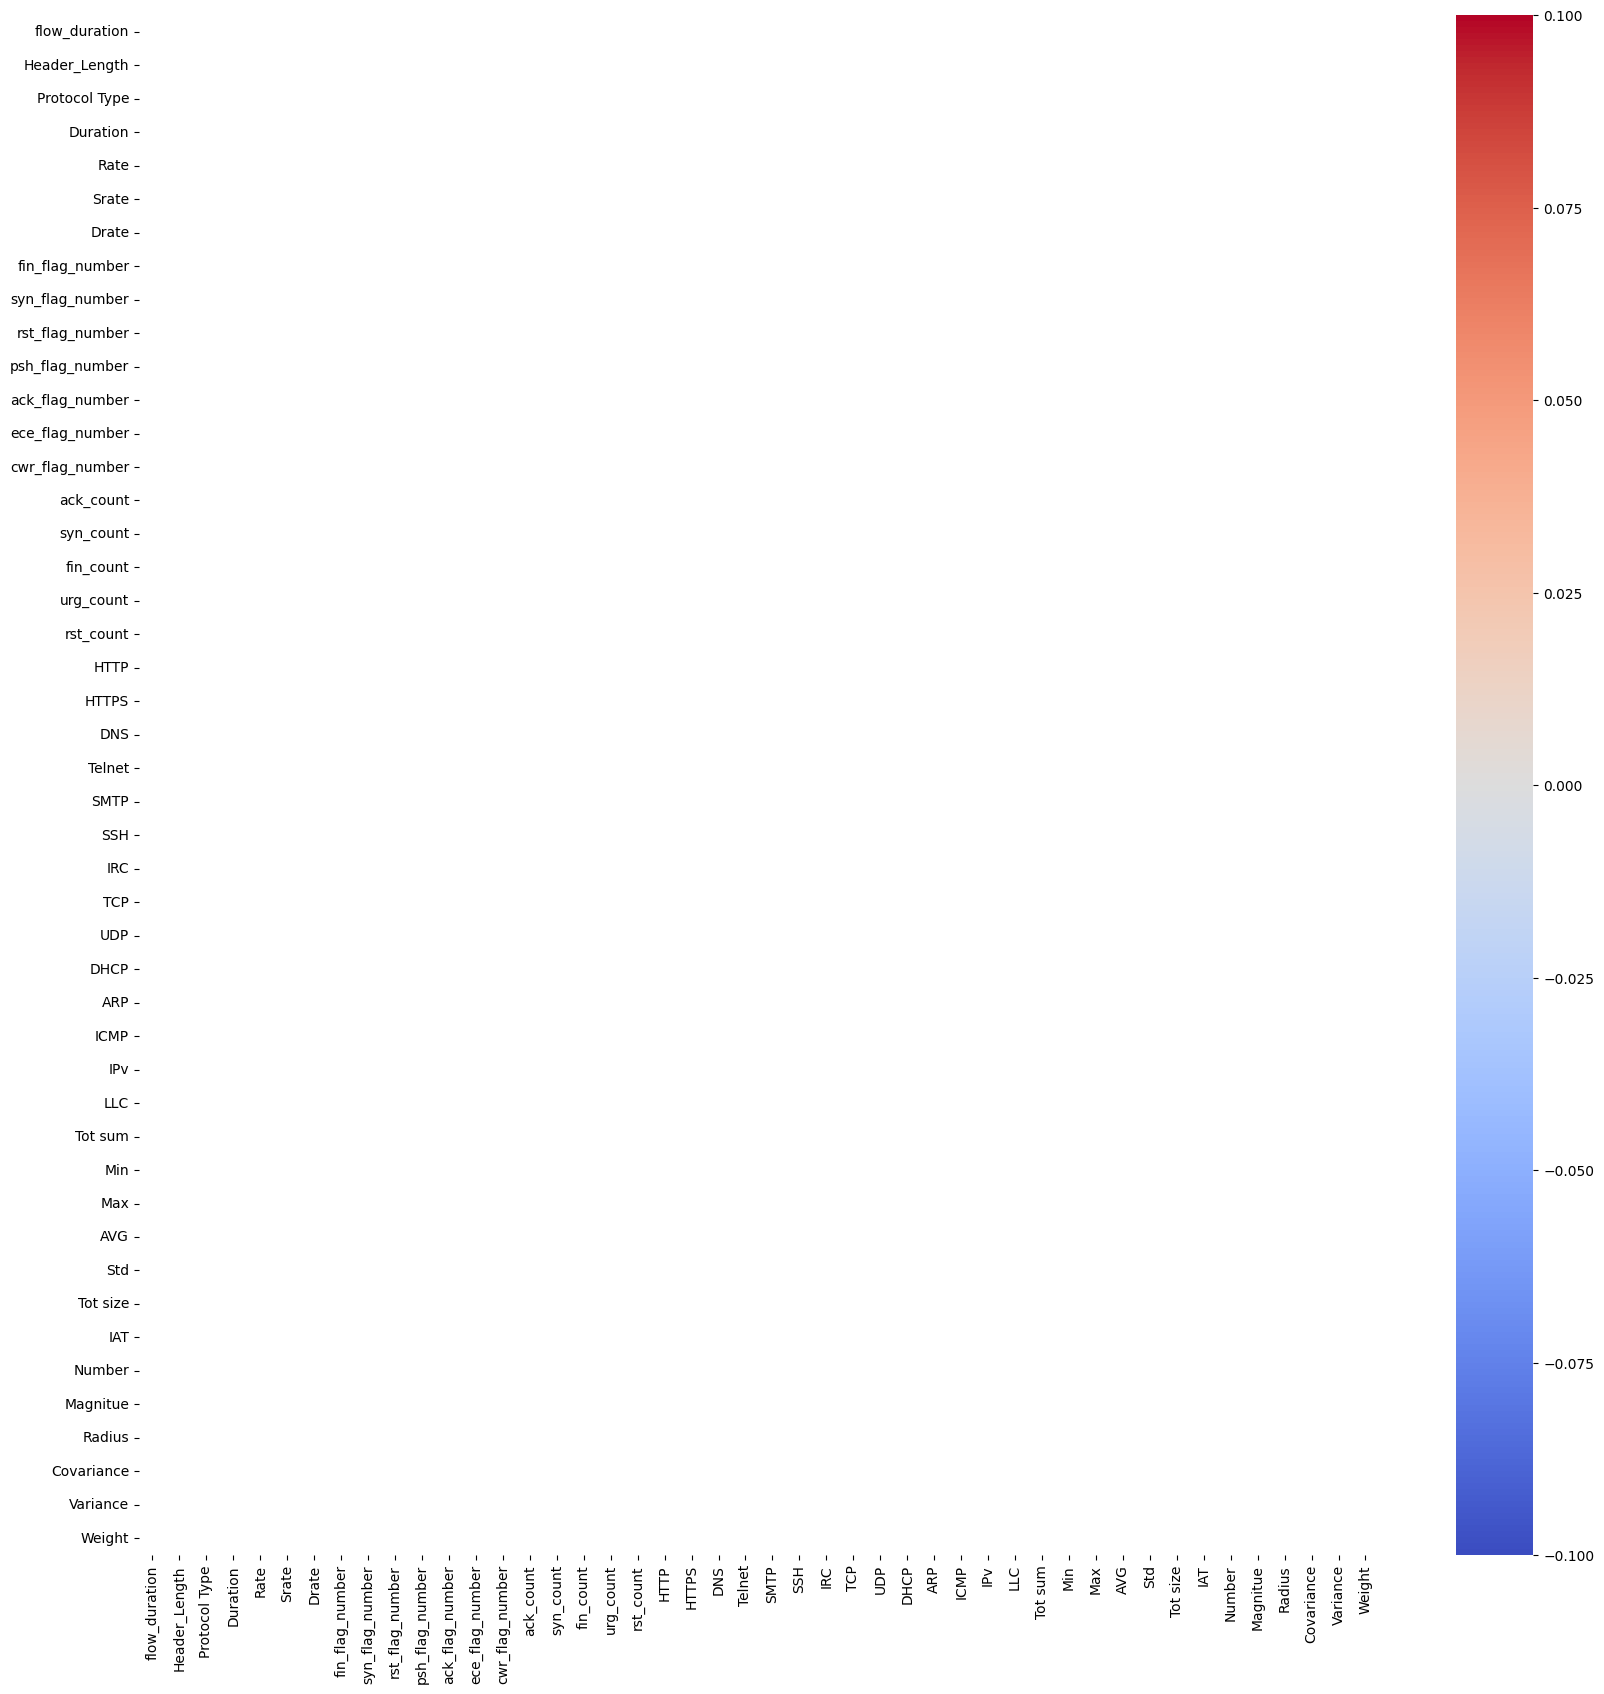

In [85]:
plt.figure(figsize=(20, 20))
heatmap=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.savefig("heatmap.png")


<h4><span style="color:blue">Scatter Plot</span></h4>

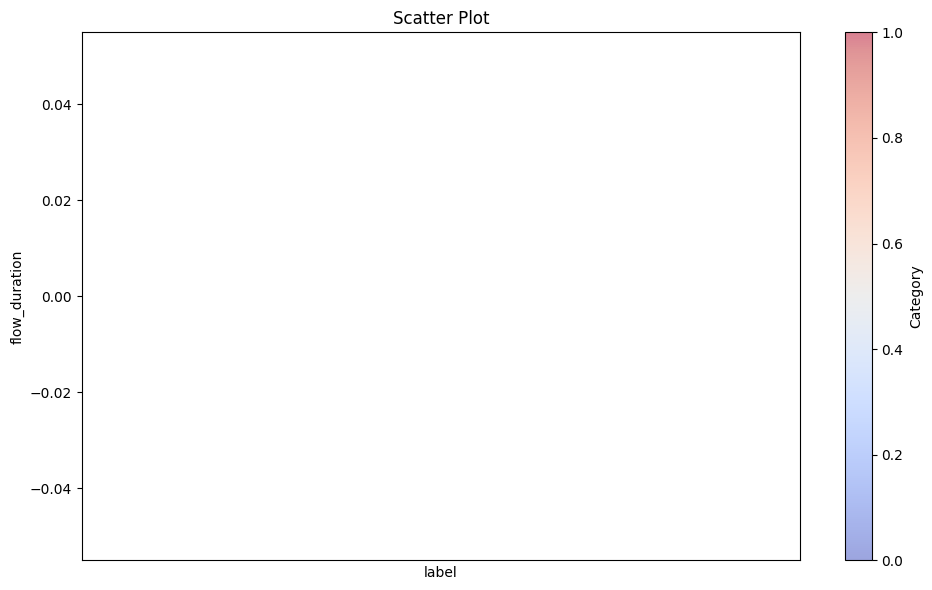

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['label'], df['flow_duration'], c=pd.factorize(df['label'])[0], cmap='coolwarm', alpha=0.5)
ax.set_title('Scatter Plot')
ax.set_xlabel('label')
ax.set_ylabel('flow_duration')
unique_labels = df['label'].unique()
ax.set_xticks(range(len(unique_labels)))
ax.set_xticklabels(unique_labels, rotation=45, ha='right', rotation_mode='anchor')
fig.tight_layout()
cbar = plt.colorbar(scatter)
cbar.set_label('Category') 

plt.show()


<h4><span style="color:blue">Label Remapping</span></h4>
To enhance data clarity and simplify analysis, we have grouped diverse  labels into broader categories. This strategic remapping promotes a clearer visualization of patterns, aiding in the effective interpretation of our dataset.

In [99]:
remap_attacks = {
    'DDoS-RSTFINFlood': 'DDoS', 'DDoS-PSHACK_Flood': 'DDoS','DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS','DDoS-TCP_Flood': 'DDoS','DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS','DDoS-ACK_Fragmentation': 'DDoS', 
    'DDoS-UDP_Fragmentation': 'DDoS','DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-SlowLoris': 'DDoS','DDoS-HTTP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS','DoS-SYN_Flood': 'DoS','DoS-TCP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS','Mirai-greeth_flood': 'Mirai','Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai','Recon-PingSweep': 'Recon','Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon','VulnerabilityScan': 'Recon',
    'Recon-HostDiscovery': 'Recon','DNS_Spoofing': 'Spoofing','MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign', 'BrowserHijacking': 'Web',
    'Backdoor_Malware': 'Web','XSS': 'Web',
    'Uploading_Attack': 'Web','SqlInjection': 'Web',
    'CommandInjection': 'Web',
    'DictionaryBruteForce': 'BruteForce'
}
df['label'] = df['label'].map(remap_attacks)
print(df.value_counts('label'))

label
DDoS          2661785
DoS            633613
Mirai          207137
Benign          85976
Spoofing        38015
Recon           27550
Web              1952
BruteForce       1042
Name: count, dtype: int64



<h4><span style="color:blue">Count Plot</span></h4>


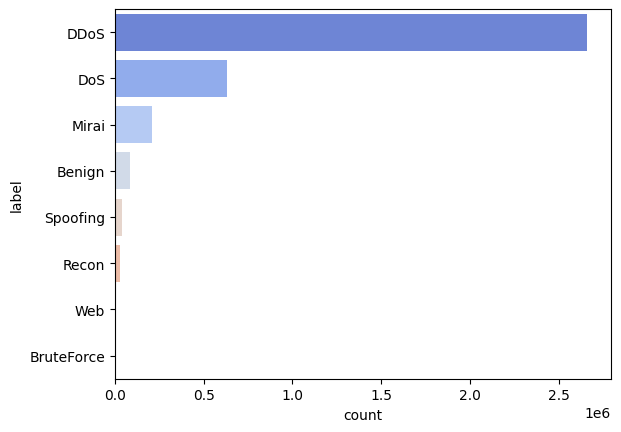

In [100]:
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='coolwarm')
plt.xlabel('count')
plt.savefig("labels.png")


<h4><span style="color:blue">Pair Plots</span></h4>


In [ ]:
def get_aggregates(df):

    means = dict()
    df_features = [x for x in df.columns]
    means = {x:[] for x in df.columns}
    targets = [x for x in df['label'].unique()]
   
    for target in targets:
        target_df = df.loc[df['label'] == target].copy()
        for k,v in means.items():
            if k != 'label':
                v.append(target_df[k].mean())
        v.append(target)
        del target_df
    
    means_df = pd.DataFrame(means)
    maxes = dict()
    maxes = {x:[] for x in df.columns}
    targets = [x for x in df['label'].unique()]
    
    for target in targets:
        target_df = df.loc[df['label'] == target].copy()
        for k,v in maxes.items():
            if k != 'label':
                v.append(target_df[k].max())
        v.append(target)
        del target_df

    max_df = pd.DataFrame(maxes)

    mins = dict()
    mins = {x:[] for x in df.columns}
    targets = [x for x in df['label'].unique()]
    
    for target in targets:
        target_df = df.loc[df['label'] == target].copy()
        for k,v in mins.items():
            if k != 'label':
                v.append(target_df[k].min())
        v.append(target)
        del target_df

    min_df = pd.DataFrame(mins)
    
    return means_df, max_df, min_df

In [ ]:
def create_plots(means_df, max_df, min_df):
    
    df_features = [x for x in means_df.columns]
    zero_features = ['IRC', 'SMTP', 'Telnet', 'ece_flag_number', 'cwr_flag_number', 'label']
    features = [x for x in df_features if x not in zero_features]
    fig, axs = plt.subplots(len(features), 2, figsize=(10, 3 * len(df_features)))
    for i, feature in enumerate(features):
  

        axs[i][0].bar(means_df['label'], means_df[feature], alpha=1,color='skyblue')
        axs[i][0].set_title(f'{feature} vs Label')
        axs[i][0].set_xlabel('Label')
        axs[i][0].set_ylabel(feature)
        axs[i][0].tick_params(axis='x', rotation=90)
        axs[i][1].bar(means_df['label'], means_df[feature], alpha=1,color='violet')
        axs[i][1].plot(max_df['label'], max_df[feature], color='black', alpha=1, marker='o')
        axs[i][1].plot(min_df['label'], min_df[feature], color='white', alpha=1, marker='o')
        axs[i][1].set_title(f'{feature} vs Label')
        axs[i][1].set_xlabel('Label')
        axs[i][1].set_ylabel(feature)
        axs[i][1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [ ]:
means_df_34, max_df_34, min_df_34 = get_aggregates(df)
create_plots(means_df_34, max_df_34, min_df_34)
plt.savefig("scatter.png")


<h4><span style="color:blue">Box Plot</span></h4>

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=numerical_columns, orient='h')
plt.title('Box plot for numerical columns')
plt.show()

<!DOCTYPE html>
<html lang="en">

<body>
    <h1>
        <a id="prep"></a>
        <b>
            <p style="background-color:#f0f8ff;font-family:'Arial', sans-serif;font-size:36;color: blue;text-align:center;border-radius:15px 50px; padding:18px; border:solid 2px blue; box-shadow: 10px 10px 10px #031a3a">
                Data Preprocessing
            </p>
        </b>
    </h1>


       
<div style="background-color:#fafbfc;font-family:Arial;font-size:120%;border-radius:25px ; padding:15px; border:solid 2px blue;text-align:center; ">
        
   <p>

Currently, the emphasis is on refining the CIC_IoT dataset for optimal cyberattack detection in IoT. Through essential preprocessing steps, we tackle issues like missing values, outliers, and noise to enhance data quality. Standardizing formats, scaling features, and encoding variables contribute to a consistent dataset structure. Additionally, employing feature engineering extracts valuable insights, further improving the dataset's readiness for advanced machine learning.
  </div>
 </body>
</html>


   <a id="cleaning"></a>
<h2><b><span style="color:blue">  1 | Data Cleaning</span></b></h2>


To clean our dataset, we employ data cleaning techniques to rectify errors, manage missing values, handle duplicates, address outliers, and ensure proper formatting.


<h4><span style="color:blue">Handeling Missing Values</span></h4>


Our dataset is well-prepared, with no missing values in any feature.
This absence of null values ensures data integrity and eliminates the need for imputation.



<h4><span style="color:blue">Handeling Duplication</span></h4>



Our dataset is free from duplicate entries, ensuring that each record is unique.
Duplication checks contribute to the overall cleanliness of the dataset.


<h4><span style="color:blue">Identifing And Handeling Outliers</span></h4>


At this stage, we swiftly identify outliers using the z-score method. Additionally, we use isolation forests for efficient outlier resolution. This streamlined approach enhances data quality, crucial for analyses, especially in IoT cybersecurity.




<h4><span style="color:blue">Outliers Identification</span></h4>


Outliers were detected in the dataset using a method that computes z-scores for selected numeric columns. The process involved identifying data points with absolute z-scores beyond a threshold, indicating their deviation from the typical distribution. The code then reported the number of outliers for each column and provided the indices of the first 10 outliers. This approach offers a quick insight into the presence and location of outliers in the dataset.

In [101]:
columns_to_check = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
                    'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
                    'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
                    'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP',
                    'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT',
                    'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

outliers_info = {}


for column in columns_to_check:
 
    z_scores = stats.zscore(df[[column]])
    outliers = (np.abs(z_scores) > 3).all(axis=1)

    
    indices_outliers = np.where(outliers)[0][:10]

    nbr_outliers = np.sum(outliers)

    
    print(f"outliers number in {column}: {nbr_outliers}, Indices of the first 10 outliers: {indices_outliers}")

    outliers_info[column] = {'nbr_outliers': nbr_outliers, 'indices_outliers': indices_outliers}

print("\total outliers number by column:")
for column, info in outliers_info.items():
    print(f"{column}: {info['nbr_outliers']}")

outliers number in flow_duration: 2039, Indices of the first 10 outliers: [ 3815  6721  6781  8526  9306  9705 11032 13713 13757 18444]
outliers number in Header_Length: 62681, Indices of the first 10 outliers: [ 33  45  50 103 126 136 201 210 223 232]
outliers number in Protocol Type: 134836, Indices of the first 10 outliers: [  0  12  13  14  25 118 133 172 221 224]
outliers number in Duration: 65108, Indices of the first 10 outliers: [ 85 120 185 299 439 555 633 690 702 727]
outliers number in Rate: 18937, Indices of the first 10 outliers: [ 258  390  430  471  542  648  697  835  963 1132]
outliers number in Srate: 18937, Indices of the first 10 outliers: [ 258  390  430  471  542  648  697  835  963 1132]
outliers number in Drate: 159, Indices of the first 10 outliers: [ 11057  20637  46743  67604  75034 177558 259216 266706 277822 280027]
outliers number in fin_flag_number: 316962, Indices of the first 10 outliers: [  5  21  26  30  60  70  84 128 134 140]
outliers number in syn_

We used the Isolation Forest method to find and remove outliers in the dataset. This method works well for spotting unusual data points. We first applied it to the numeric columns. It gave us predictions for each data point, which we used to identify the outliers. We then removed these outliers from the dataset. This helped improve the quality of our data and make our model more reliable.

In [102]:
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
   
    winsorized_values = winsorize(df[column], limits=[0.01, 0.01])
   
    df[column] = winsorized_values

print("After Winsorization:")
print(df.describe())

After Winsorization:


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

       flow_duration  Header_Length  Protocol Type      Duration  \
count   3.657070e+06   3.657070e+06   3.657070e+06  3.657070e+06   
mean    1.742831e+00   6.034762e+04   9.070879e+00  6.592408e+01   
std     7.845232e+00   2.982284e+05   8.954069e+00  9.668630e+00   
min     0.000000e+00   0.000000e+00   9.900000e-01  6.257000e+01   
25%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
50%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
75%     1.047880e-01   2.799500e+02   1.442000e+01  6.400000e+01   
max     6.311279e+01   2.267799e+06   4.700000e+01  1.385500e+02   

               Rate         Srate      Drate  fin_flag_number  \
count  3.657070e+06  3.657070e+06  3657070.0     3.657070e+06   
mean   3.698179e+03  3.698179e+03        0.0     8.667102e-02   
std    1.506416e+04  1.506416e+04        0.0     2.813524e-01   
min    0.000000e+00  0.000000e+00        0.0     0.000000e+00   
25%    2.088013e+00  2.088013e+00        0.0     0.000000e+00 

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<a id="imbalanced"></a>
<h2><b><span style="color:blue">  2 | Dealing with Class Imbalance</span></b></h2>
<p>
Our labeled dataset shows class imbalance, notably with minority classes like "web," "recon," and others. It's crucial to address this imbalance to prevent the domination of other classes and ensure fair model training. Strategies such as oversampling, employing  ensemble methods are implemented to empower the model to make accurate predictions for these less-represented classes.
</p>


In [103]:
n = 30000
df = df.groupby('label', group_keys=False).apply(lambda x: x.head(n))


Initial sampling was performed, but as some classes had insufficient instances, SMOTE oversampling was applied to ensure a more balanced representation, resulting in 30,000 instances for each class.

In [104]:
x = df.drop('label', axis=1)
y = df['label']

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

df = pd.DataFrame(x_resampled, columns=x.columns)
df['label'] = y_resampled


print(df.value_counts('label'))
print(df.shape)




label
Benign        30000
BruteForce    30000
DDoS          30000
DoS           30000
Mirai         30000
Recon         30000
Spoofing      30000
Web           30000
Name: count, dtype: int64
(240000, 47)


   <a id="feature_engineering"></a>
<h2><b><span style="color:blue">  3 | Feature Engineering</span></b></h2>
<p>In this step, we are going to engage in feature engineering, which involves skillful manipulation, addition, deletion, combination, and mutation of our dataset. This process aims to enhance machine learning model training, ultimately resulting in improved performance and greater accuracy.
</p>

<a id="encoding"></a>
<h4><span style="color:blue">Categorical Features Encoding</span></h4>

In data preprocessing, categorical variables, such as the 'label' column in our dataset, are encoded into a numerical format to make them compatible with machine learning algorithms. This transformation is necessary because many machine learning algorithms can only handle numeric features.
 

In [105]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


<a id="norm"></a>
<h4><span style="color:blue">Numeric Features Scaling</span></h4>
In this step, we optimized our dataset by applying robust scaling to  numeric features. This ensures uniformity for balanced model training and promotes comparability and stability. Scaling was applied to enhance precision in machine learning outcomes, and it also contributes to handling the rest of previousely identified outliers for a more resilient model.

In [106]:
features = df.drop('label', axis=1)
scaler = RobustScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
df = pd.concat([scaled_features, df['label']], axis=1)


 <a id="feature_selection"></a>
<h2><b><span style="color:blue"><b/> 4 | Feature Selection</span></h2>
Due to the presence of numerous features in our dataset, feature selection was employed to streamline and focus on the most influential variables, optimizing the model's performance and simplifying its interpretation. This strategic choice helps mitigate complexity, reduce overfitting, and enhance the efficiency of the machine learning model.
    

<h4><span style="color:blue">SelectKBest</span></h4>
SelectKBest with Mutual Information was employed to filter and identify the top 10 features based on mutual information scores for predicting the 'label' variable. Additionally, Recursive Feature Elimination (RFE) with RandomForestClassifier was utilized to pinpoint the top 10 features crucial for accurate 'label' predictions. The results from both methods were combined, creating a comprehensive set of top 10 selected features

In [107]:
# SelectKBest with Mutual Information
k_best = SelectKBest(score_func=mutual_info_classif, k=15)
x_selected_kbest = k_best.fit_transform(df.drop('label', axis=1), df['label'])
selected_features_kbest = df.drop('label', axis=1).columns[k_best.get_support()]




In [109]:
df_selected_features = pd.DataFrame(x_selected_kbest, columns=selected_features_kbest)
df_concatenated = pd.concat([df_selected_features, df['label']], axis=1)



<!DOCTYPE html>
<html lang="en">

<body>
    <h1>
        <a id="prep"></a>
        <b>
            <p style="background-color:#f0f8ff;font-family:'Arial', sans-serif;font-size:36;color: blue;text-align:center;border-radius:15px 50px; padding:18px; border:solid 2px blue; box-shadow: 10px 10px 10px #031a3a">
               Modeling
            </p>
        </b>
    </h1>


       
<div style="background-color:#fafbfc;font-family:Arial;font-size:120%;border-radius:25px ; padding:15px; border:solid 2px blue;text-align:center; ">
        
   <p>
With our CIC_IoT dataset now refined and ready, we're moving on to the modeling stage for cyberattack detection in IoT. We'll focus on picking the right algorithms, tweaking settings for optimal performance, and checking the model's accuracy to make sure it works well. This overall approach, combining both preparing the data and building the model, ensures our system is set up to accurately and effectively spot cyberattacks in IoT networks.
  </div>
 </body>
</html>


 <a id="model_selection"></a>
<h2><b><span style="color:blue"><b/> 1 | Model Selection</span></h2>


We considered several models for our cybersecurity analysis, including K-Nearest Neighbors (KNN), Logistic Regression, and LightGBM. The choice of these models was driven by their suitability for classification tasks, interpretability, and performance in handling the characteristics of our dataset.

In [110]:
X = df_concatenated.drop('label', axis=1)
y = df_concatenated['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 <a id="model_traing"></a>
<h2><b><span style="color:blue"><b/> 2 | Model Training and Testing</span></h2>



<h2><b><span style="color:blue">   Random Forest</span></b></h2>

 

In [113]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [114]:
rf_coef = rf_model.feature_importances_
rf_pred = rf_model.predict(X_test)
rf_score = rf_model.score(X_test, y_test)

print("Random Forest Coefficients:", rf_coef)
print("Random Forest Predictions:", rf_pred)
print("Random Forest Score:", rf_score)

Random Forest Coefficients: [0.09811068 0.06648364 0.0478089  0.06303781 0.09049931 0.05451933
 0.05800178 0.0610048  0.0682821  0.07131299 0.17308902 0.01671899
 0.06758699 0.04620737 0.01733631]
Random Forest Predictions: [1 5 6 ... 2 6 6]
Random Forest Score: 0.911



<h2><b><span style="color:blue"> Logistic Regression</span></b></h2>


In [115]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
lr_coef = lr_model.coef_
lr_pred = lr_model.predict(X_test)
lr_score = lr_model.score(X_test, y_test)
print("Logistic Regression Coefficients:", lr_coef)
print("Logistic Regression Predictions:", lr_pred)
print("Logistic Regression Score:", lr_score)

Logistic Regression Coefficients: [[ 3.22250320e-01 -3.72445730e-02  8.41663675e-01  1.10105622e+00
   1.06045594e+00 -6.27879048e-01 -6.61664353e-02  5.84909685e-01
   4.16656730e-02  8.97286954e-02 -1.66158631e-01 -3.64575931e-01
  -1.66498662e-01  2.50255451e+00 -3.68556153e-01]
 [-5.04042004e-01 -1.11707534e+00  2.66042193e-01  7.06518215e-01
   1.26774878e+00 -9.05333504e-01 -6.20760509e-02  2.75703297e-01
  -4.90680114e-03 -1.99856864e-01 -3.10132746e-01 -3.03186513e-01
   8.73605115e-01  4.03467993e+00 -2.98297828e-01]
 [-1.87994706e-01 -6.56192893e-01 -2.91087513e+00 -2.55899731e+00
  -2.87824463e+00  1.77829226e+00 -3.50873550e-01 -8.60212075e-01
   1.81866038e+00  1.43176598e+00  4.27229123e-01  3.32168701e-01
  -8.50943457e-01 -6.30679368e+00  3.32114793e-01]
 [-1.44634181e+00  3.55398031e-01 -2.95565486e-01 -2.05852444e+00
  -1.06676649e+00  7.67531802e-04 -7.65931936e-02  3.06662183e-01
   6.84583525e-02 -4.00856259e-02  1.49617485e-01  3.65749291e-01
   2.73939056e-01 -5.

<a id="loading"></a>
<h2><b><span style="color:blue"> Decision Tree</span></b></h2>



In [129]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
dt_pred = dt_model.predict(X_test)
dt_score = dt_model.score(X_test, y_test)
print("Decision Tree Predictions:", dt_pred)
print("Decision Tree Score:", dt_score)

Decision Tree Predictions: [1 1 6 ... 2 6 6]
Decision Tree Score: 0.86725


<a id="loading"></a>
<h2><b><span style="color:blue">  K-Nearest Neighbors</span></b></h2>



In [123]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [131]:
knn_pred = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
print("K-Nearest Neighbors Predictions:", knn_pred)
print("K-Nearest Neighbors Score:", knn_score)

K-Nearest Neighbors Predictions: [1 7 6 ... 2 6 6]
K-Nearest Neighbors Score: 0.8136458333333333



<h2><b><span style="color:blue"> Naive Bayes</span></b></h2>



In [132]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [133]:
nb_pred = nb_model.predict(X_test)
nb_score = nb_model.score(X_test, y_test)
print("Naive Bayes Predictions:", nb_pred)
print("Naive Bayes Score:", nb_score)


Naive Bayes Predictions: [7 1 1 ... 3 1 6]
Naive Bayes Score: 0.46047916666666666


<h2><b><span style="color:blue">  Multi-Layer Perceptron (Neural Network)</span></b></h2>


In [134]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [135]:
mlp_pred = mlp_model.predict(X_test)
mlp_score = mlp_model.score(X_test, y_test)
print("Multi-Layer Perceptron Predictions:", mlp_pred)
print("Multi-Layer Perceptron Score:", mlp_score)

Multi-Layer Perceptron Predictions: [1 5 6 ... 2 6 6]
Multi-Layer Perceptron Score: 0.7583125


<h2><b><span style="color:blue">  Ensemble Learning with Voting Classifier for Classification</span></b></h2>

In [137]:
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Multi-Layer Perceptron", MLPClassifier())
]


pipelines = classifiers


eclf = VotingClassifier(estimators=pipelines, voting='hard')

eclf.fit(X_train, y_train)


y_pred = eclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Classifier Accuracy: 0.8500416666666667


 <a id="evaluation"></a>
<h2><b><span style="color:blue"><b/> 3 | Model Evaluation</span></h2>


In [141]:
results = []
for name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, accuracy, recall, precision, f1])



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<style>
    table {
        width: 100%;
        border-collapse: collapse;
    }

    th, td {
        border: 1px solid black;
        padding: 20px; /* Increase padding for bigger cells */
        text-align: left;
        font-size: 20px; /* Increase font size */
    }

    th {
        background-color: #f2f2f2; /* light gray */
    }

    tr:nth-child(even) {
        background-color: #f2f2f2; /* light gray */
    }

    tr:nth-child(odd) {
        background-color: #ffffff; /* white */
    }

    tr:hover {
        background-color: #d9e6ff; /* light blue */
    }
</style>

<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Accuracy</th>
            <th>Recall</th>
            <th>Precision</th>
            <th>F1 Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Random Forest</td>
            <td>0.910875</td>
            <td>0.910875</td>
            <td>0.909934</td>
            <td>0.909381</td>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>0.556667</td>
            <td>0.556667</td>
            <td>0.567451</td>
            <td>0.55396</td>
        </tr>
        <tr>
            <td>Decision Tree</td>
            <td>0.866667</td>
            <td>0.866667</td>
            <td>0.86584</td>
            <td>0.866159</td>
        </tr>
        <tr>
            <td>K-Nearest Neighbors</td>
            <td>0.813646</td>
            <td>0.813646</td>
            <td>0.817182</td>
            <td>0.809795</td>
        </tr>
        <tr>
            <td>Naive Bayes</td>
            <td>0.460479</td>
            <td>0.460479</td>
            <td>0.410691</td>
            <td>0.397777</td>
        </tr>
        <tr>
            <td>Multi-Layer Perceptron</td>
            <td>0.754333</td>
            <td>0.754333</td>
            <td>0.769064</td>
            <td>0.753979</td>
        </tr>
    </tbody>
</table>


 <a id="visualizations"></a>
<h2><b><span style="color:blue"><b/> 4 | Result Visualization</span></h2>



<h4><span style="color:blue">Confusion Matrix</span></h4>

  

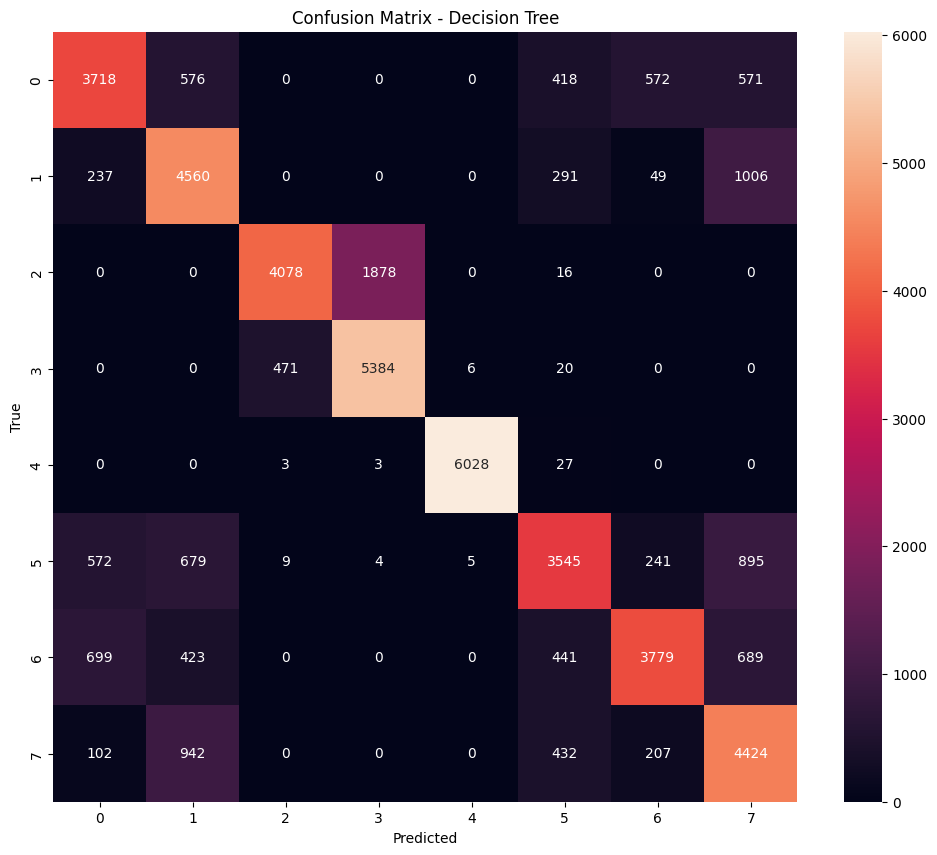

<Figure size 640x480 with 0 Axes>

In [145]:
conf_matrix_dt = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_dt, annot=True, fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix_dt.png')


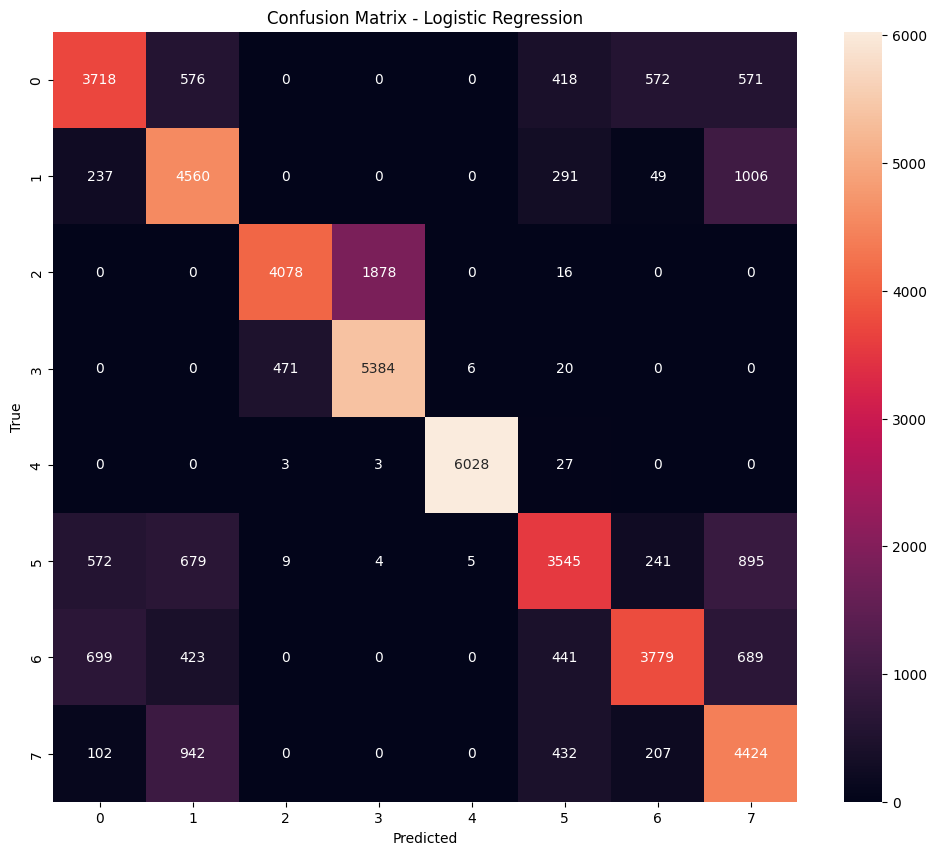

<Figure size 640x480 with 0 Axes>

In [144]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix_lr.png')

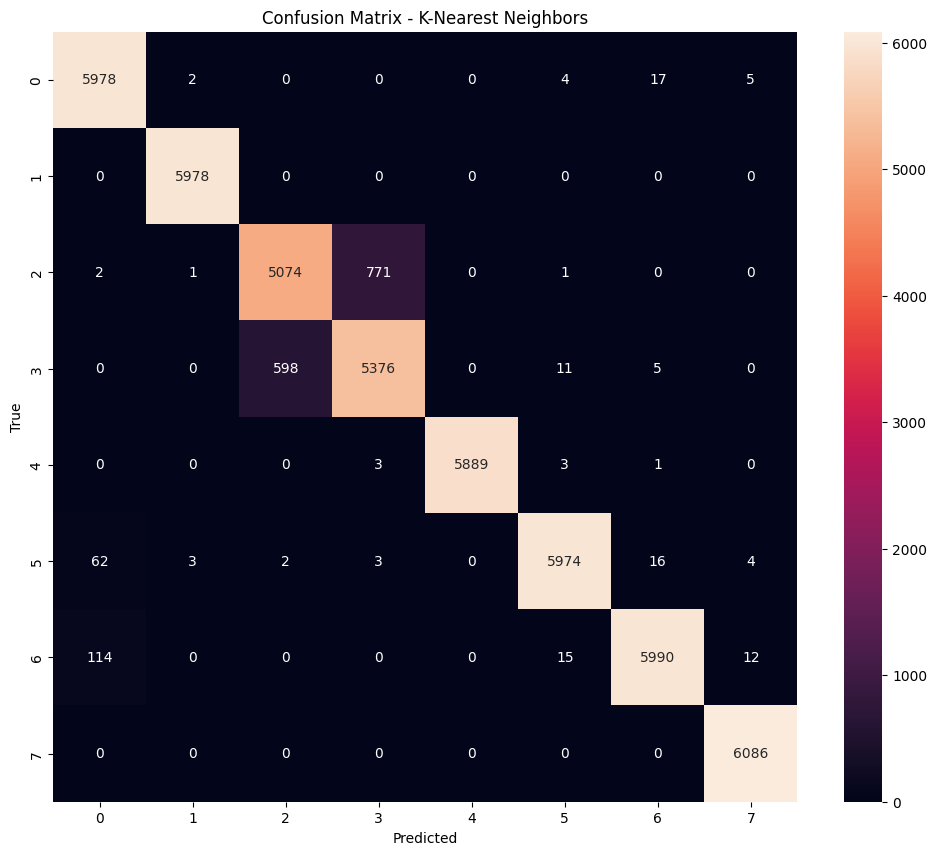

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(12, 10))  
sns.heatmap(conf_matrix_knn, annot=True, fmt='g')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix_knn.png')


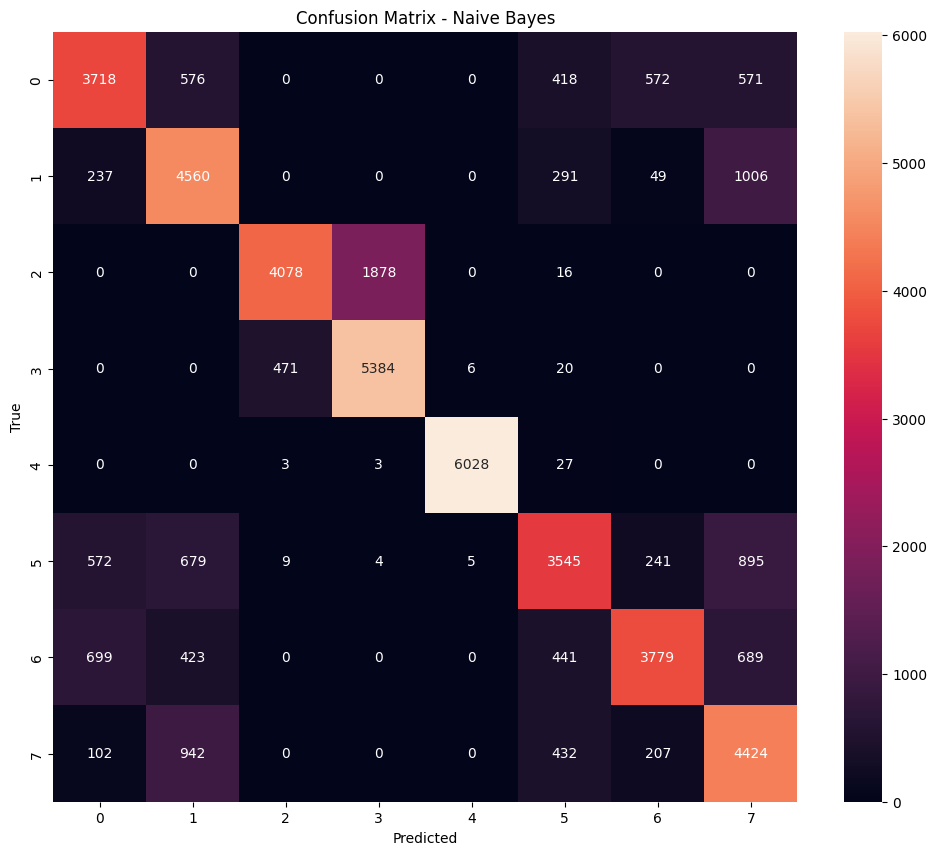

<Figure size 640x480 with 0 Axes>

In [146]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_nb, annot=True, fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix_nb.png')

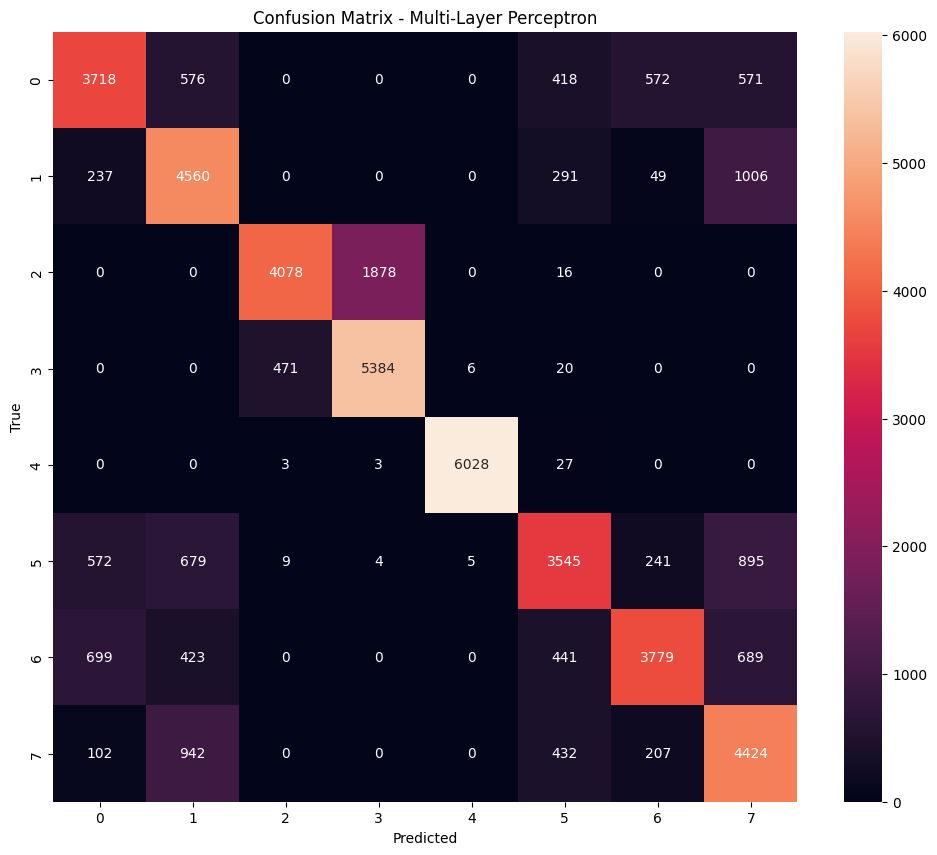

<Figure size 640x480 with 0 Axes>

In [147]:
conf_matrix_mlp = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='g')
plt.title('Confusion Matrix - Multi-Layer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_matrix_mlp.png')